# Objective
In this notebook, we are going to look at the Healthy Ride Stations dataset and observe which neighborhood is the best to be in during an alien abduction. Obviously, you want to have the most readily avaliable access to bikes to bike away from tractor beams as opposed to your friends who are going to be escaping by running (so inefficient am I right?). Also, cars are not a good option because they make you a more attractive target.

![bike](https://media.giphy.com/media/jTx79AE82MwDzq6WkL/giphy.gif)

In [70]:
# imports all necessary libraries
import pandas as pd
import numpy as np
import json
from descartes import PolygonPatch
from shapely.geometry import LineString
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas

In [71]:
# load the data from csv file
healthy_ride_data = pd.read_csv("healthy_ride.csv") 

# load first 5 rows to identify what data we are working with 
healthy_ride_data.head()

,Station #,Station Name,# of Racks,Latitude,Longitude
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080
2,1002,Third Ave & Wood St,15,40.439030,-80.001860
3,1003,First Ave & Smithfield St,9,40.437200,-80.000375
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102


In [72]:
# displays number of entries we are working with and seeing if there are any null values
healthy_ride_data.count()

Station #       105
Station Name    105
# of Racks      105
Latitude        105
Longitude       105
dtype: int64

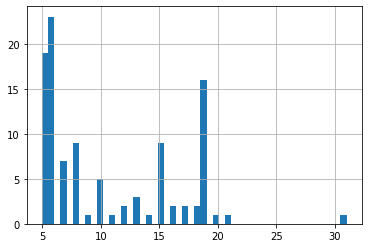

In [73]:
# plots histogram to look at the frequency 
healthy_ride_data["# of Racks"].hist(bins=50)

### Observation: 
As we can see, one of the stations has over 30 bikes (very cool), while the majority of stations contain 5-6 bikes and suprisingly 16-17 bikes.  

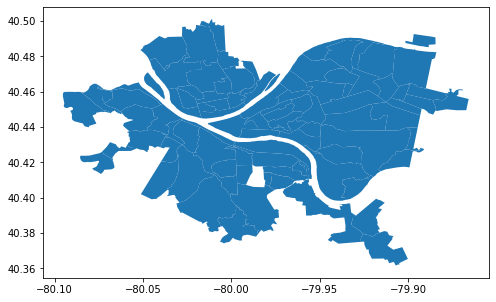

In [74]:
# plots the neighborhoods and their boundaries in Pittsburg
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot(figsize = (8,8)) # plot the geopandas dataframe

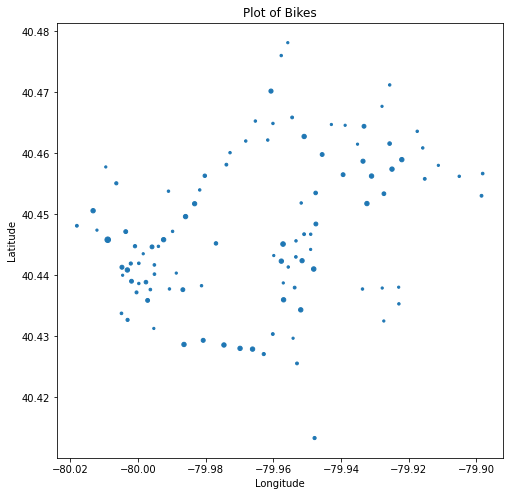

In [75]:
# creates scatter plot of where there are healthy ride stations using their longitude and latitude 
# as x & y, and uses the # of racks to determine the size of each point
healthy_ride_data.plot.scatter(x='Longitude', 
                               y='Latitude', 
                               figsize = (8,8),
                               s=healthy_ride_data["# of Racks"],
                               title= "Plot of Bikes")

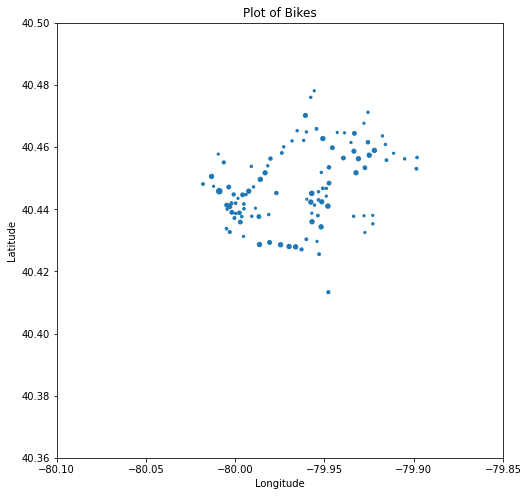

In [76]:
# creates the same scatter plot but this time setting the x and y limits to 
# see the data relative to the neighborhood chart previously plotted
healthy_ride_data.plot.scatter(x='Longitude', 
                               y='Latitude', 
                               figsize = (8,8),
                               s=healthy_ride_data["# of Racks"],
                               xlim = (-80.10,-79.85),
                               ylim = (40.36,40.50),
                               title= "Plot of Bikes")

In [77]:
# transform the neighborhood geometry to a new coordinate reference system
neighborhoods = neighborhoods.to_crs({'init': 'epsg:4326'})

fig = plt.figure(figsize=(8, 8)) 
ax = neighborhoods.plot()

# gets x and y coordinates from the datset 
x, y = healthy_ride_data['Longitude'].values, healthy_ride_data['Latitude'].values
ax.scatter(x,y, marker="*", color='r', alpha=0.7, zorder=5, s=2)
plt.show

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [78]:
#get a list of coordinate points (lat/long)
gdf = geopandas.GeoDataFrame(healthy_ride_data, geometry=geopandas.points_from_xy(healthy_ride_data.Longitude, healthy_ride_data.Latitude))
g = gdf['geometry'] 
#use .contains to create a boolean array (True for each point in the shape)
booleans = pd.concat([neighborhoods.contains(point) for point in g], axis=1)
#convert that boolean array into a list containting the count for each neighborhood
counts = []
for index, row in booleans.iterrows():
    b = row.tolist()
    count = sum(b)
    counts.append(count)

In [79]:
#create final dataframe with neighborhood and station counts
final = pd.read_csv("Neighborhoods.csv")
final = final[["objectid", "hood"]] #use csv file to get neighborhood names
final.rename(columns={'objectid': 'ID', 'hood': 'Neighborhood'}, inplace=True)
#add counts to dataframe
final["Number of HealthyRide Stations"] = counts
#sort and output dataframe
sort = final.sort_values(by=["Number of HealthyRide Stations"], ascending = False)
sort.head()

,ID,Neighborhood,Number of HealthyRide Stations
41,1334,Central Business District,18
37,1330,North Oakland,9
40,1333,Strip District,8
61,1354,South Side Flats,7
31,1324,Shadyside,7


Cool! Now we have an overlap of the station points and neighborhood plot

#### Map of Pittsburg and its Neighborhoods

![Pittsburgh Map](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Pittsburgh_Pennsylvania_neighborhoods_fade.svg/500px-Pittsburgh_Pennsylvania_neighborhoods_fade.svg.png)


### Interpreting the Data
Wow, there only seems to be stations located in the downtown, east end-south, and east end-north. I guess if you are anywhere else, you'd have to run away or hide. The best neighborhoods in terms of accessability to healthy ride stations and total number of bikes are the Central Business District, the Oaklands, Strip District, Southside Flats, and East Liberty. So, if there's anything that we learned, its that if you can ride a bike and are located around campus or the downtown, then you can probably get to a bike and escape an alien abduction. 